In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
daily = pd.read_csv("C:\\Users\\Nyla Majid\\OneDrive\\Documents\\dailyActivity_merged.csv")
sleep = pd.read_csv("C:\\Users\\Nyla Majid\\OneDrive\\Documents\\sleepDay_merged.csv")

In [3]:
daily.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [23]:
daily['ActivityDate'] = pd.to_datetime(daily['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])

In [24]:
daily.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
Weekday                             object
dtype: object

In [25]:
daily.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Weekday                     0
dtype: int64

In [26]:
sleep.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [27]:
sleep.isnull().sum

<bound method DataFrame.sum of         Id  SleepDay  TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
0    False     False              False               False           False
1    False     False              False               False           False
2    False     False              False               False           False
3    False     False              False               False           False
4    False     False              False               False           False
..     ...       ...                ...                 ...             ...
408  False     False              False               False           False
409  False     False              False               False           False
410  False     False              False               False           False
411  False     False              False               False           False
412  False     False              False               False           False

[410 rows x 5 columns]>

In [28]:
daily.duplicated().sum()

np.int64(0)

In [29]:
sleep.duplicated().sum()

np.int64(0)

In [30]:
sleep_cleaned=sleep.drop_duplicates(inplace=True)

In [31]:
sleep.duplicated().sum()

np.int64(0)

In [32]:
daily.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday


In [33]:
sleep.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407


In [34]:
merged = pd.merge(daily, sleep, left_on=['Id','ActivityDate'], right_on=['Id','SleepDay'], how='outer')

In [35]:
merged.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2016-04-13,2.0,384.0,407.0


In [36]:
merged[['TotalSteps','Calories','TotalMinutesAsleep']].corr()


,TotalSteps,Calories,TotalMinutesAsleep
TotalSteps,1.000000,0.591568,-0.190344
Calories,0.591568,1.000000,-0.031699
TotalMinutesAsleep,-0.190344,-0.031699,1.000000


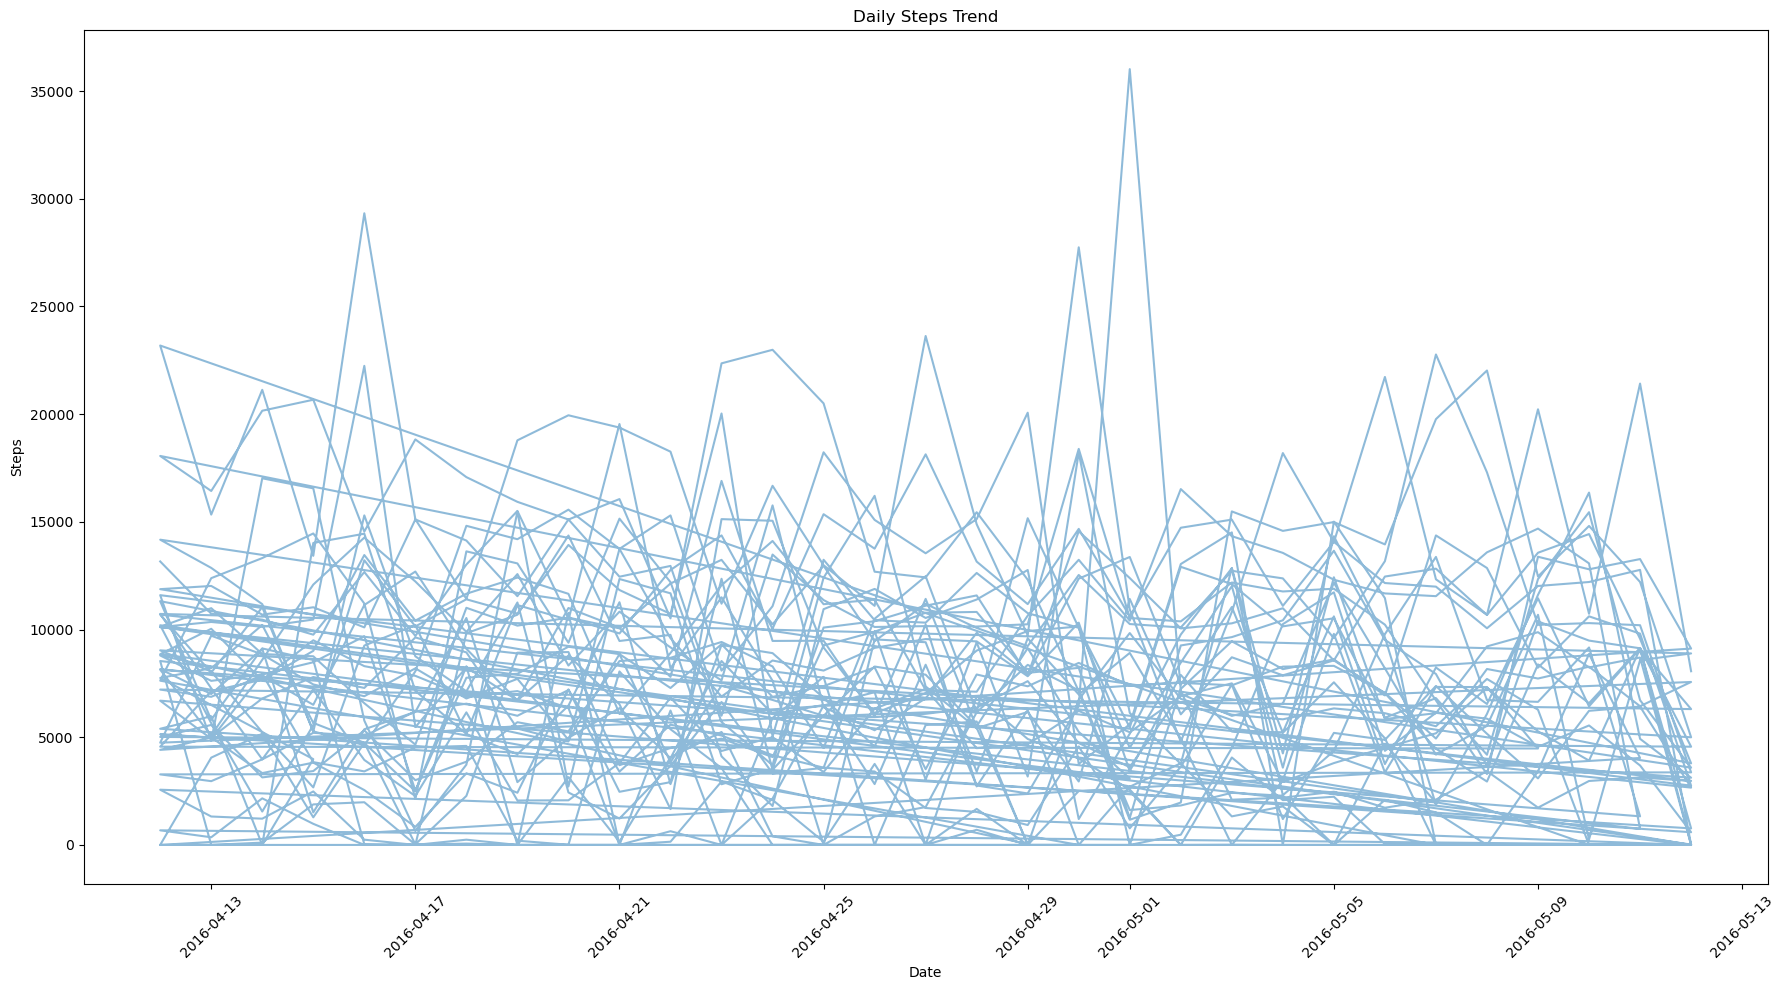

In [51]:
#exploratory data analysis
plt.figure(figsize=(18,10))
plt.plot(daily['ActivityDate'], daily['TotalSteps'],alpha=0.5)
plt.title('Daily Steps Trend')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

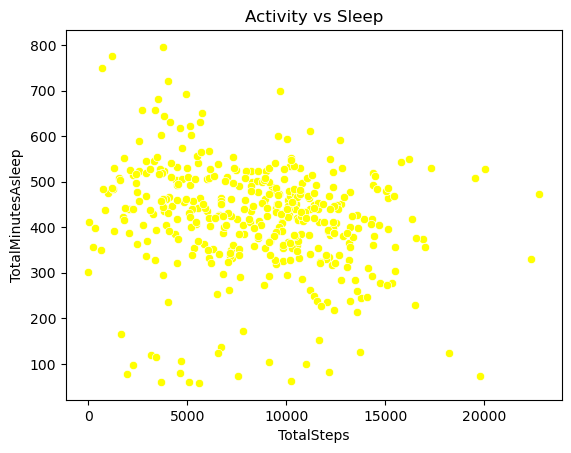

In [38]:
sns.scatterplot(data=merged, x='TotalSteps', y='TotalMinutesAsleep',color="yellow")
plt.title('Activity vs Sleep')
plt.show()

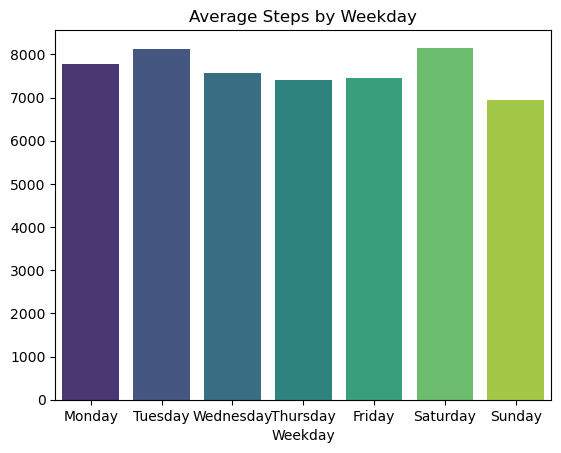

In [42]:
#Average Steps by Weekday
daily['Weekday'] = daily['ActivityDate'].dt.day_name()
weekday_avg = daily.groupby('Weekday')['TotalSteps'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.barplot(x=weekday_avg.index, y=weekday_avg.values,hue=weekday_avg.index,palette="viridis",legend=False)
plt.title('Average Steps by Weekday')
plt.show()

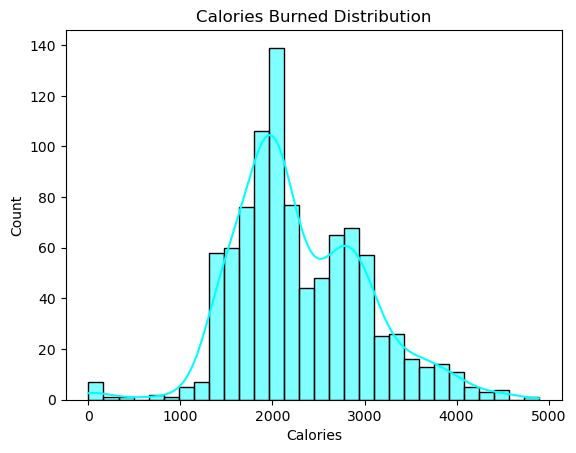

In [45]:
#Calories Burned Distribution:
sns.histplot(daily['Calories'], bins=30, kde=True,color="cyan")
plt.title('Calories Burned Distribution')
plt.show()

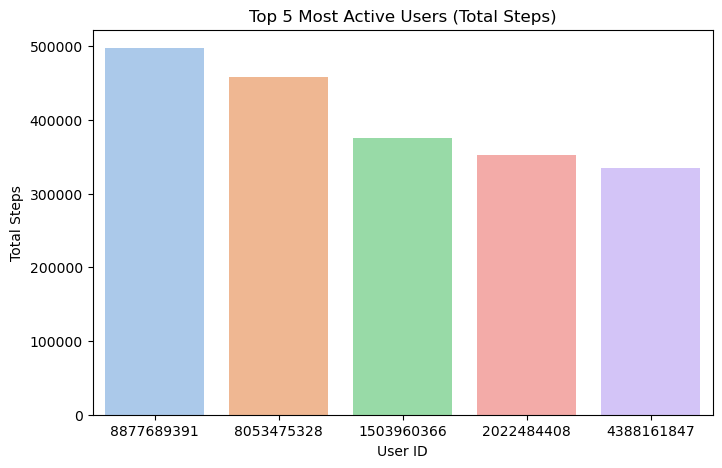

In [44]:
# Step 5: Top Active Users
top_users = daily.groupby('Id')['TotalSteps'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values,hue=top_users.index.astype(str),palette="pastel",legend=False)
plt.title('Top 5 Most Active Users (Total Steps)')
plt.ylabel('Total Steps')
plt.xlabel('User ID')
plt.show()

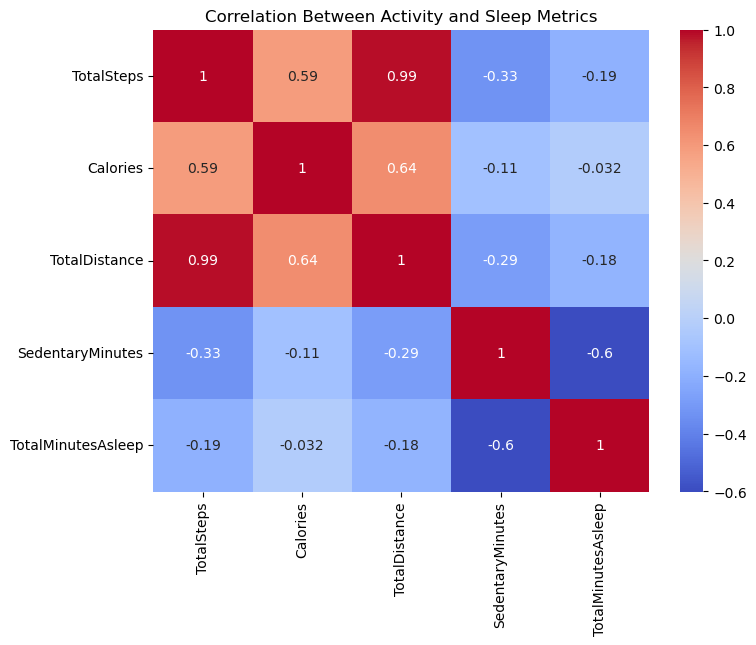

In [63]:
# Step 8: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged[['TotalSteps','Calories','TotalDistance','SedentaryMinutes','TotalMinutesAsleep']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Activity and Sleep Metrics')
plt.show()